# Comparison of Acevedo's passage 2 data when 3 repeats or only 2 repeats are used
In both cases, we consider a quality threshold of 60, i.e. a quality of 20 with 3 repeats, or 30 with two repeats. This means that we expect to have fewer remaining bases when only 2 repeats are used, because many will not pass the quality threshold. The analyses have been performed using Acevedo's scripts, modified in the case with 2 repeats.

## Reading in the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

colNames = ["position","referenceBase","A","C", "G", "T"]
counts = pd.read_csv ("outputPassage2/Q20threshold.txt", sep="\t", header=None, names=colNames)

counts2Repeats = pd.read_csv ("output2RepeatsPassage2/Q30threshold.txt", sep="\t", header=None, names=colNames)

#Utilitary variables
axisFontSize = 20
titleFontSize = 25
axisTickFontSize = 12

matplotlib.rc('xtick', labelsize=axisTickFontSize)
matplotlib.rc('ytick', labelsize=axisTickFontSize)
rcParams["axes.labelsize"]=axisFontSize


## Computing statistics of interest

In [2]:
def coverage(a,c,g,t):
    cov = a+c+g+t
    return cov

def majorBaseRatio(a,c,g,t,coverage):
    l=[a,c,g,t]
    l.sort()
    return l[3]/coverage 

def secondMajorBaseRatio(a,c,g,t,coverage):
    l=[a,c,g,t]
    l.sort()
    return l[2]/coverage 

def thirdMajorBaseRatio(a,c,g,t,coverage):
    l=[a,c,g,t]
    l.sort()
    return l[1]/coverage 

def fourthMajorBaseRatio(a,c,g,t,coverage):
    l=[a,c,g,t]
    l.sort()
    return l[0]/coverage 

def ARatio(a,coverage):
    return a/coverage 

def CRatio(c,coverage):
    return c/coverage 

def GRatio(g,coverage):
    return g/coverage 

def TRatio(t,coverage):
    return t/coverage 

def computeCoverageAndRatios (counts):
    counts["coverage"]= list ( map(coverage, counts["A"], counts["C"], counts["G"], counts["T"]) )
    counts["majorBaseRatio"]  = list ( map(majorBaseRatio, counts["A"], counts["C"], counts["G"], counts["T"], counts["coverage"]) )
    counts["secondMajorBaseRatio"]  = list ( map(secondMajorBaseRatio, counts["A"], counts["C"], counts["G"], counts["T"], counts["coverage"]) )
    counts["thirdMajorBaseRatio"] = list ( map(thirdMajorBaseRatio, counts["A"], counts["C"], counts["G"], counts["T"], counts["coverage"]) ) 
    counts["fourthMajorBaseRatio"] = list ( map(fourthMajorBaseRatio, counts["A"], counts["C"], counts["G"], counts["T"], counts["coverage"]) )
    counts["ARatio"] = list ( map(ARatio, counts["A"], counts["coverage"]) )
    counts["CRatio"] = list ( map(CRatio, counts["C"], counts["coverage"]) )
    counts["GRatio"] = list ( map(GRatio, counts["G"], counts["coverage"]) )
    counts["TRatio"] = list ( map(TRatio, counts["T"], counts["coverage"]) )
    return

computeCoverageAndRatios (counts)
counts.describe()

computeCoverageAndRatios (counts2Repeats)
counts2Repeats.describe()

,position,A,C,G,T,coverage,majorBaseRatio,secondMajorBaseRatio,thirdMajorBaseRatio,fourthMajorBaseRatio,ARatio,CRatio,GRatio,TRatio
count,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7.440000e+03,7440.000000,7440.000000,7440.000000,7440.000000
mean,3720.500000,8890.115860,6196.209812,6261.159005,6604.208602,27951.693280,0.999831,0.000156,0.000012,7.547070e-07,0.296490,0.233567,0.229988,0.239955
std,2147.887334,17868.928163,14740.967915,15020.695824,15280.144813,20370.965153,0.000553,0.000550,0.000034,5.752558e-06,0.456662,0.423010,0.420777,0.426965
min,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,0.964345,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1860.750000,0.000000,0.000000,0.000000,0.000000,13016.000000,0.999779,0.000032,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,3720.500000,1.000000,0.000000,0.000000,1.000000,21585.000000,0.999893,0.000094,0.000000,0.000000e+00,0.000036,0.000000,0.000000,0.000044
75%,5580.250000,10174.500000,9.000000,9.000000,21.000000,39176.500000,0.999964,0.000203,0.000000,0.000000e+00,0.999785,0.000366,0.000295,0.000575
max,7440.000000,109826.000000,103673.000000,106297.000000,103631.000000,109862.000000,1.000000,0.035655,0.000620,1.709110e-04,1.000000,1.000000,1.000000,1.000000


## Impact of the number of repeats on coverage.

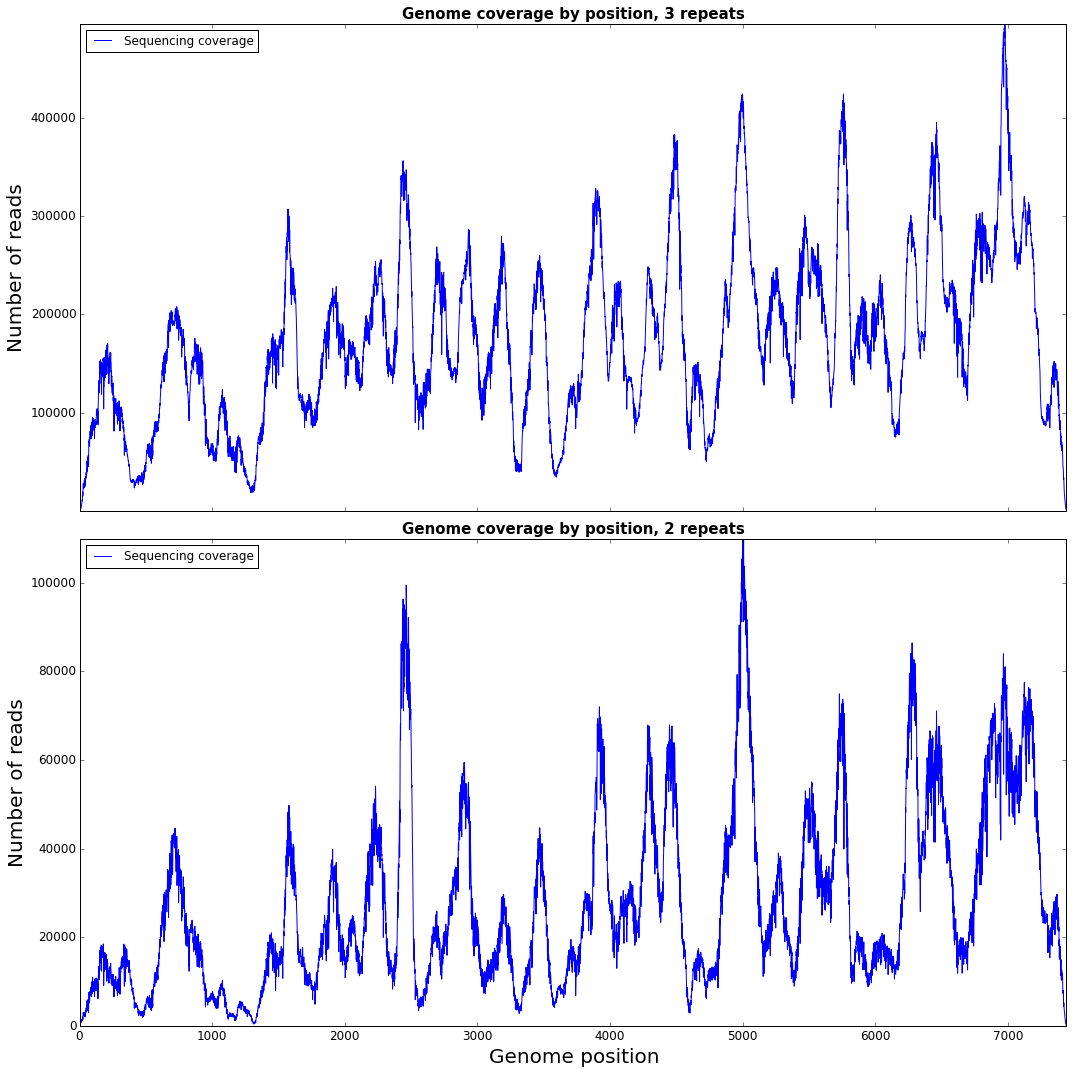

In [3]:
%matplotlib inline

def plotCoverage(subplot, counts, title):
    rcParams['figure.figsize'] = 18, 8
    subplot.set_title(title, fontsize=15, fontweight='bold')
    subplot.set_ylabel ('Number of reads')
    subplot.plot (counts ['position'], counts ['coverage'], 'b-') #(position, coverage, 'r-')
    fig_size = rcParams["figure.figsize"]
    subplot.legend (['Sequencing coverage'], loc = 'upper left')
    yaxis_lower_limit = counts ['coverage'].min()
    yaxis_upper_limit = counts ['coverage'].max()
    xaxis_lower_limit = counts ['position'].min()
    xaxis_upper_limit = counts ['position'].max()
    subplot.axis ([xaxis_lower_limit, xaxis_upper_limit, yaxis_lower_limit, yaxis_upper_limit])

f, axarr = plt.subplots(2, sharex=True,figsize=(15,15))
plotCoverage(axarr[0], counts,'Genome coverage by position, 3 repeats')
plotCoverage(axarr[1], counts2Repeats,'Genome coverage by position, 2 repeats')
plt.xlabel ('Genome position')
plt.tight_layout()


### Conclusion: Coverage took a severe hit when going from 3 repeats with quality threshold at 20, or 2 repeats with quality threshold at 30.

## Impact of the number of repeats on allele frequency.

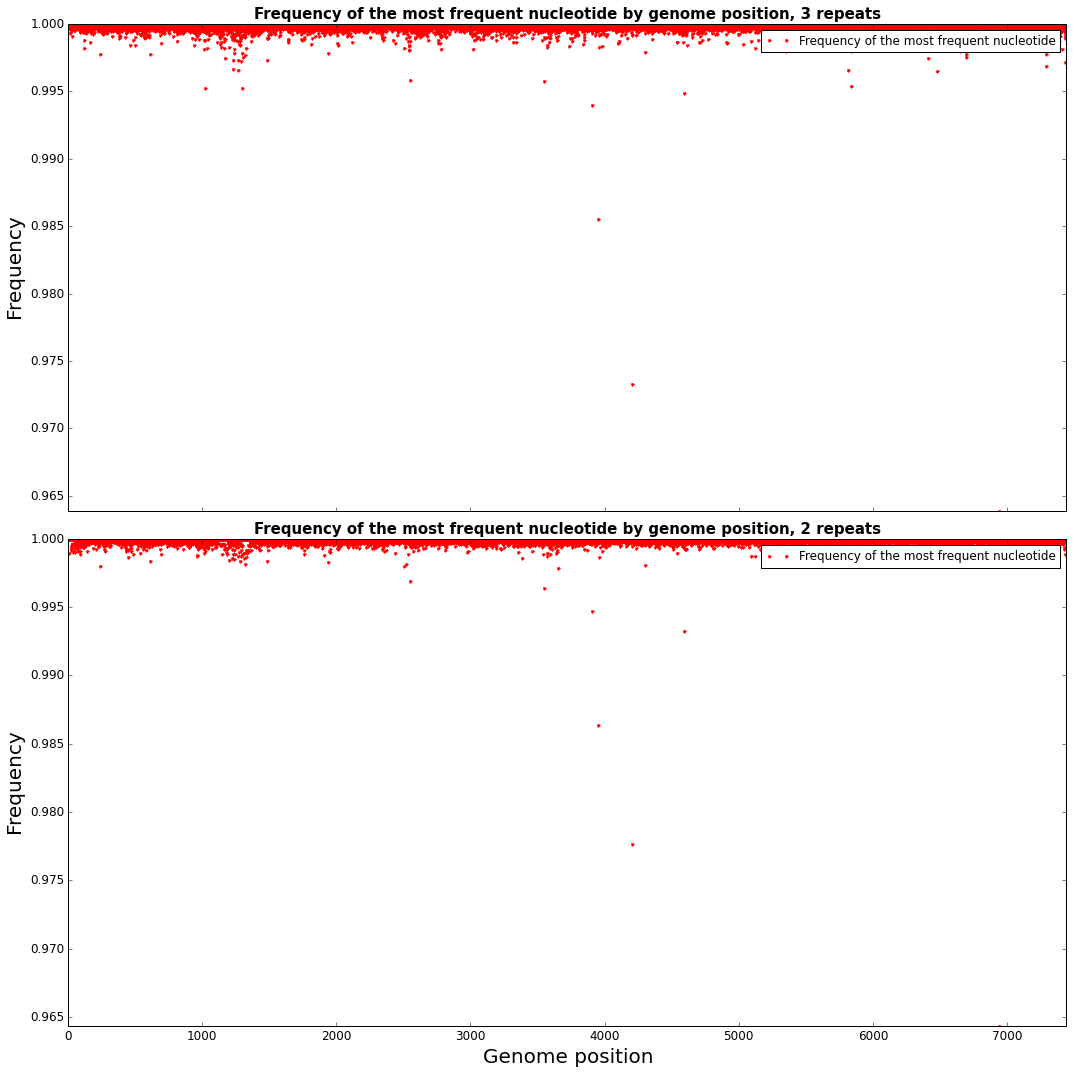

In [4]:
%matplotlib inline

def plotFrequencyOfMostFrequentNucleotide (subplot, counts, title):
    rcParams['figure.figsize'] = 18, 8
    subplot.set_title(title, fontsize=15, fontweight='bold')
    subplot.set_ylabel ('Frequency')
    subplot.plot (counts ['position'], counts ['majorBaseRatio'], 'r.') #(position, coverage, 'r-')
    fig_size = rcParams["figure.figsize"]
    subplot.legend (['Frequency of the most frequent nucleotide'], loc = 'upper right')
    yaxis_lower_limit = counts ['majorBaseRatio'].min()
    yaxis_upper_limit = counts ['majorBaseRatio'].max()
    xaxis_lower_limit = counts ['position'].min()
    xaxis_upper_limit = counts ['position'].max()
    subplot.axis ([xaxis_lower_limit, xaxis_upper_limit, yaxis_lower_limit, yaxis_upper_limit])


f, axarr = plt.subplots(2, sharex=True,figsize=(15,15))
plotFrequencyOfMostFrequentNucleotide(axarr[0], counts, 'Frequency of the most frequent nucleotide by genome position, 3 repeats')
plotFrequencyOfMostFrequentNucleotide(axarr[1], counts2Repeats, 'Frequency of the most frequent nucleotide by genome position, 2 repeats')
plt.xlabel ('Genome position')
plt.tight_layout()




### Conclusion: most outlier sites in the 3-repeat analysis also appear to be outliers in the 2-repeat analysis, except in low-coverage regions.

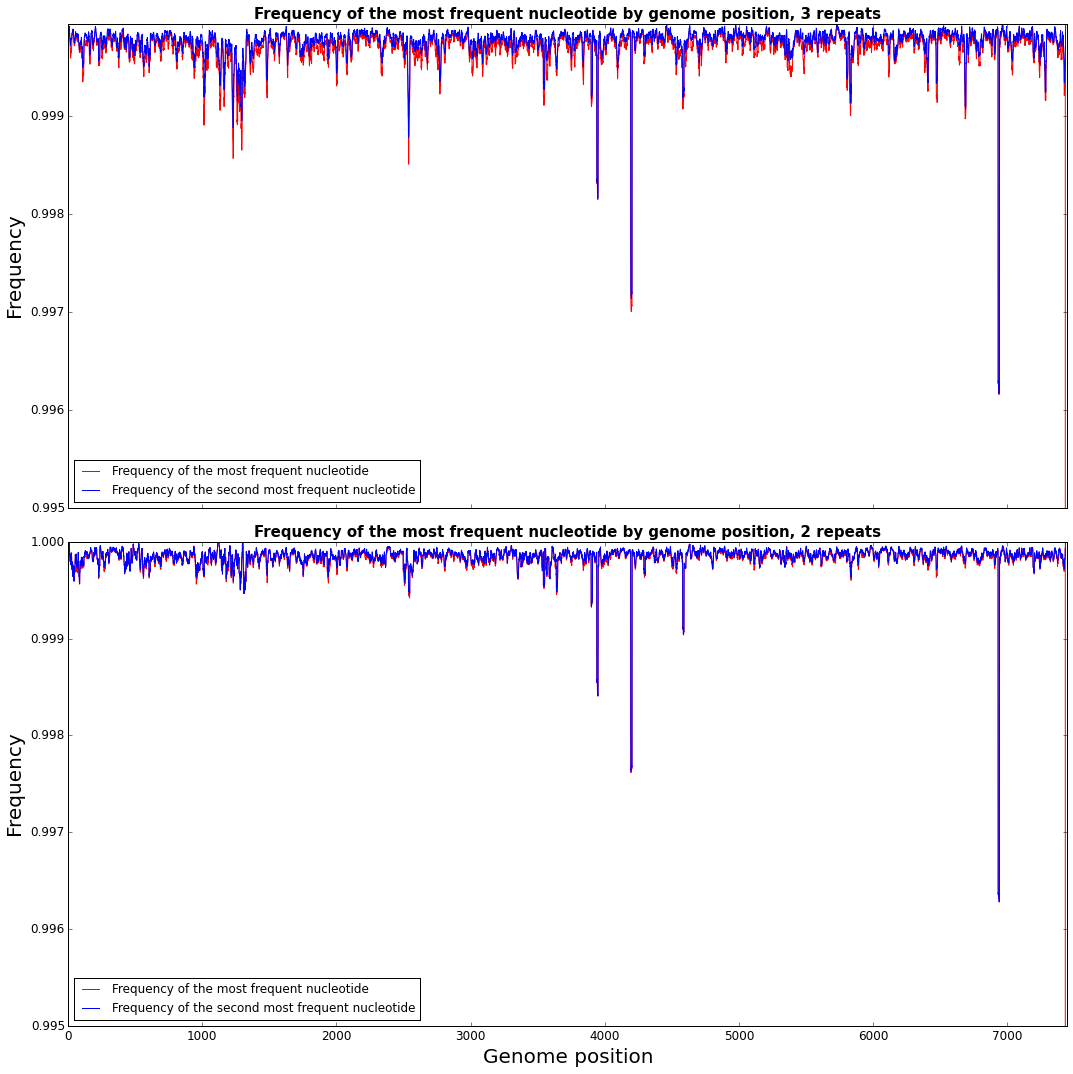

In [5]:
%matplotlib inline

def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]
   
def plotRMFrequencyOfMostFrequentNucleotide (subplot, counts, title):
    majorBaseRatioMovingAverage10 = (runningMeanFast (counts ['majorBaseRatio'], 10))
    secondMajorBaseRatioMovingAverage10 = (runningMeanFast (counts ['secondMajorBaseRatio'], 10))
    rcParams['figure.figsize'] = 18, 8
    subplot.set_title(title, fontsize=15, fontweight='bold')
    subplot.plot (counts ['position'], majorBaseRatioMovingAverage10, 'r-') #(position, coverage, 'r-')
    subplot.plot (counts ['position'], 1-secondMajorBaseRatioMovingAverage10, 'b-') #(position, coverage, 'r-')
    subplot.set_ylabel ('Frequency')
    fig_size = rcParams["figure.figsize"]
    subplot.legend (['Frequency of the most frequent nucleotide', 'Frequency of the second most frequent nucleotide'], loc = 'lower left')
    yaxis_lower_limit = 0.995
    yaxis_upper_limit = majorBaseRatioMovingAverage10.max()
    xaxis_lower_limit = counts ['position'].min()
    xaxis_upper_limit = counts ['position'].max()
    subplot.axis ([xaxis_lower_limit, xaxis_upper_limit, yaxis_lower_limit, yaxis_upper_limit])

f, axarr = plt.subplots(2, sharex=True,figsize=(15,15))
plotRMFrequencyOfMostFrequentNucleotide(axarr[0], counts, 'Frequency of the most frequent nucleotide by genome position, 3 repeats')
plotRMFrequencyOfMostFrequentNucleotide(axarr[1], counts2Repeats, 'Frequency of the most frequent nucleotide by genome position, 2 repeats')
plt.xlabel ('Genome position')
plt.tight_layout()



### Conclusion: Same result as above, some outlier regions have been lost, probably due to low coverage.

### Now we plot the 3 least frequent bases per position.

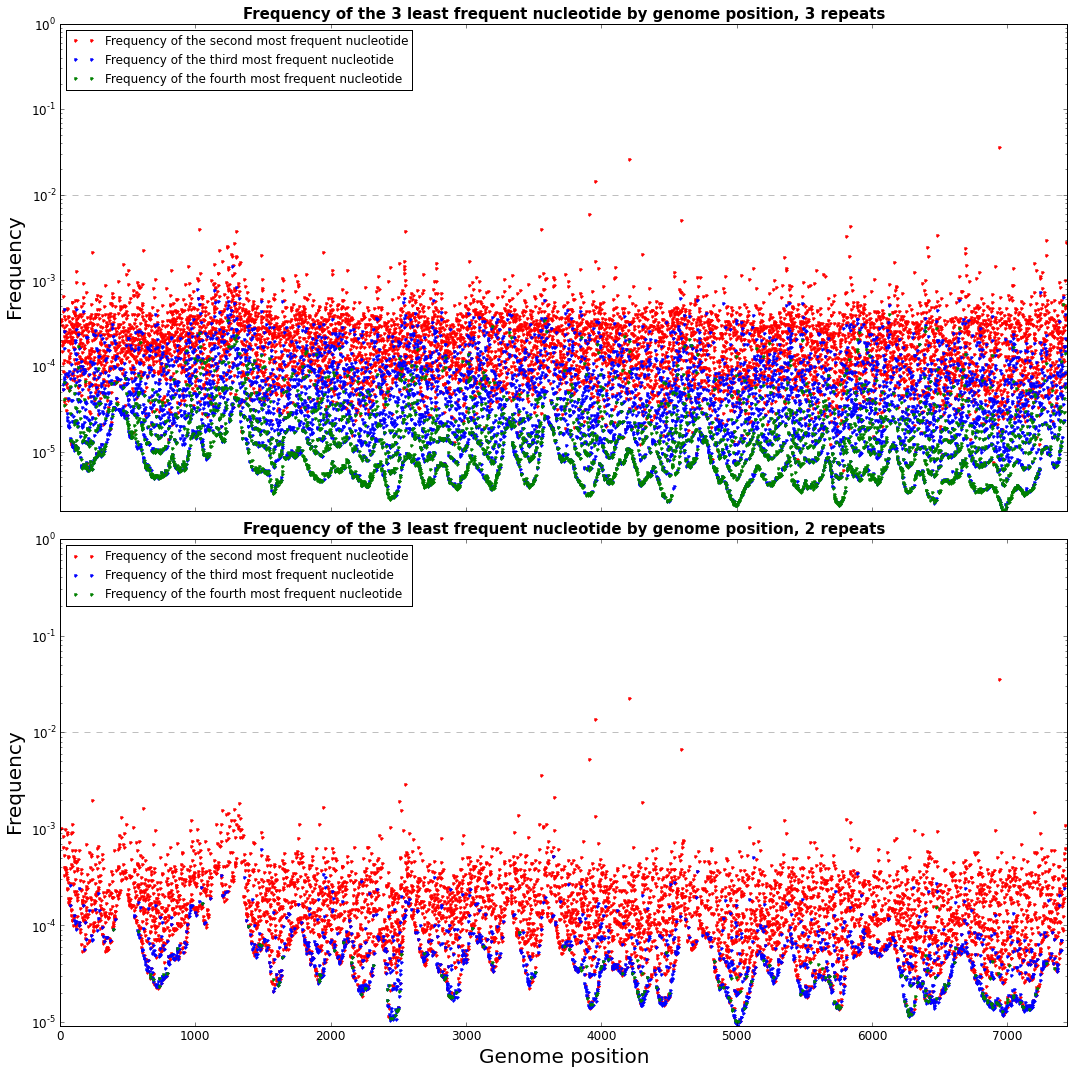

In [6]:
%matplotlib inline

def plotFrequenciesOf3LeastFrequentNucleotides (subplot, counts, title):
    rcParams['figure.figsize'] = 18, 8
    subplot.set_title(title, fontsize=15, fontweight='bold')
    subplot.plot (counts ['position'], counts ['secondMajorBaseRatio'], 'r.') #(position, coverage, 'r-')
    subplot.plot (counts ['position'], counts ['thirdMajorBaseRatio'], 'b.') #(position, coverage, 'r-')
    subplot.plot (counts ['position'], counts ['fourthMajorBaseRatio'], 'g.') #(position, coverage, 'r-')
    subplot.set_ylabel ('Frequency')
    fig_size = rcParams["figure.figsize"]
    subplot.legend (['Frequency of the second most frequent nucleotide', 'Frequency of the third most frequent nucleotide', 'Frequency of the fourth most frequent nucleotide'], loc = 'upper left')
    yaxis_lower_limit = counts ['fourthMajorBaseRatio'].min()
    yaxis_upper_limit = 1
    xaxis_lower_limit = counts ['position'].min()
    xaxis_upper_limit = counts ['position'].max()
    subplot.set_yscale('log')
    subplot.axhline(y = 0.01, linewidth=1, linestyle='dashed', color='0.75')
    subplot.axis ([xaxis_lower_limit, xaxis_upper_limit, yaxis_lower_limit, yaxis_upper_limit])

f, axarr = plt.subplots(2, sharex=True,figsize=(15,15))
plotFrequenciesOf3LeastFrequentNucleotides(axarr[0], counts, 'Frequency of the 3 least frequent nucleotide by genome position, 3 repeats')
plotFrequenciesOf3LeastFrequentNucleotides(axarr[1], counts2Repeats, 'Frequency of the 3 least frequent nucleotide by genome position, 2 repeats')
plt.xlabel ('Genome position')
plt.tight_layout()



### Conclusion: Minor alleles suffer most of using only 2 repeats instead of 3. In many cases they entirely disappear, meaning their frequency is 0.

## Impact of sequence coverage on frequency estimation
Now we are going to investigate the impact of sequence coverage on our ability to recover nucleotide frequencies. To do that we compute the Jensen-Shannon divergence (a symmetrised version of the Kullback-Leibler divergence).


In [7]:
import scipy
import math

def KullbackLeibler (p, q):
    if len(p) != len(q):
        print("Error in KL: lists with different lengths")
        exit(-1)
    kl = 0
    for i in range (len(p)):
        ratio = 1
        if p[i] == 0 and q[i] == 0:
            ratio = 1
        elif p[i] == 0:
            ratio = 0.0000000001/q[i]
        elif q[i] == 0:
            ratio = p[i]/0.0000000001
        else:
            ratio = p[i]/q[i]
        kl = kl + p[i]*math.log(ratio)
    return kl

def JensenShannon (p, q):
    meanpq = [sum(x)/2 for x in zip(p, q)]
    js = KullbackLeibler (p, meanpq) + KullbackLeibler (q, meanpq)
    return js

def computeDivergences(count1, count2):
    ratios1 = list(zip(count1['ARatio'], count1['CRatio'], count1['GRatio'], count1['TRatio']))
    ratios2 = list(zip(count2['ARatio'], count2['CRatio'], count2['GRatio'], count2['TRatio']))
    result=list()
    for i in range(len(ratios1)):
        result.append(JensenShannon (ratios1[i], ratios2[i]))
    return result

counts2Repeats['Divergence'] = computeDivergences(counts2Repeats, counts)

In [8]:
counts2Repeats.describe()

,position,A,C,G,T,coverage,majorBaseRatio,secondMajorBaseRatio,thirdMajorBaseRatio,fourthMajorBaseRatio,ARatio,CRatio,GRatio,TRatio,Divergence
count,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7.440000e+03,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000
mean,3720.500000,8890.115860,6196.209812,6261.159005,6604.208602,27951.693280,0.999831,0.000156,0.000012,7.547070e-07,0.296490,0.233567,0.229988,0.239955,0.000086
std,2147.887334,17868.928163,14740.967915,15020.695824,15280.144813,20370.965153,0.000553,0.000550,0.000034,5.752558e-06,0.456662,0.423010,0.420777,0.426965,0.000139
min,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,0.964345,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1860.750000,0.000000,0.000000,0.000000,0.000000,13016.000000,0.999779,0.000032,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000017
50%,3720.500000,1.000000,0.000000,0.000000,1.000000,21585.000000,0.999893,0.000094,0.000000,0.000000e+00,0.000036,0.000000,0.000000,0.000044,0.000042
75%,5580.250000,10174.500000,9.000000,9.000000,21.000000,39176.500000,0.999964,0.000203,0.000000,0.000000e+00,0.999785,0.000366,0.000295,0.000575,0.000100
max,7440.000000,109826.000000,103673.000000,106297.000000,103631.000000,109862.000000,1.000000,0.035655,0.000620,1.709110e-04,1.000000,1.000000,1.000000,1.000000,0.003317


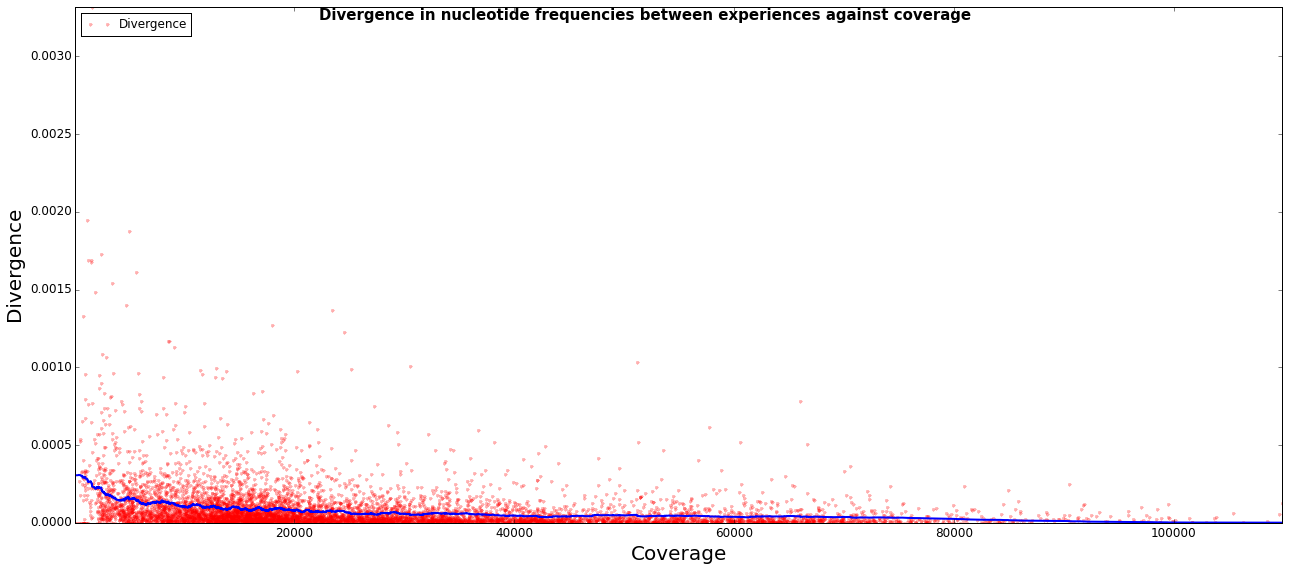

In [9]:
%matplotlib inline

def scatterPlotDivergenceVsCoverage (subplot, counts, title):
    rcParams['figure.figsize'] = 18, 8
    subplot.suptitle(title, fontsize=15, fontweight='bold')
    orderDivergenceByCoverage = [x for (y,x) in sorted(zip(counts ['coverage'],counts ['Divergence']))]
    smoothedCurve = (runningMeanFast (orderDivergenceByCoverage, 200))
    subplot.plot (counts ['coverage'], counts ['Divergence'], 'r.', alpha=0.3) 
    subplot.plot (sorted(counts ['coverage']), smoothedCurve, '-', alpha=1, linewidth=2) 
    subplot.ylabel ('Divergence')
    fig_size = rcParams["figure.figsize"]
    subplot.legend (['Divergence'], loc = 'upper left')
    yaxis_lower_limit = counts ['Divergence'].min()
    yaxis_upper_limit = counts ['Divergence'].max()
    xaxis_lower_limit = counts ['coverage'].min()
    xaxis_upper_limit = counts ['coverage'].max()
    #subplot.yscale('log')
    #subplot.axhline(y = 0.01, linewidth=1, linestyle='dashed', color='0.75')
    subplot.axis ([xaxis_lower_limit, xaxis_upper_limit, yaxis_lower_limit, yaxis_upper_limit])


#f, axarr = plt.subplots(1, sharex=True,figsize=(15,15))
scatterPlotDivergenceVsCoverage(plt, counts2Repeats, 'Divergence in nucleotide frequencies between experiences against coverage')
plt.xlabel ('Coverage')
plt.tight_layout()




### Conclusion: As expected, at higher coverage, frequencies found using 2 repeats match better those found using 3 repeats.

### Now let's look at the differences in the major and various minor allele frequencies.

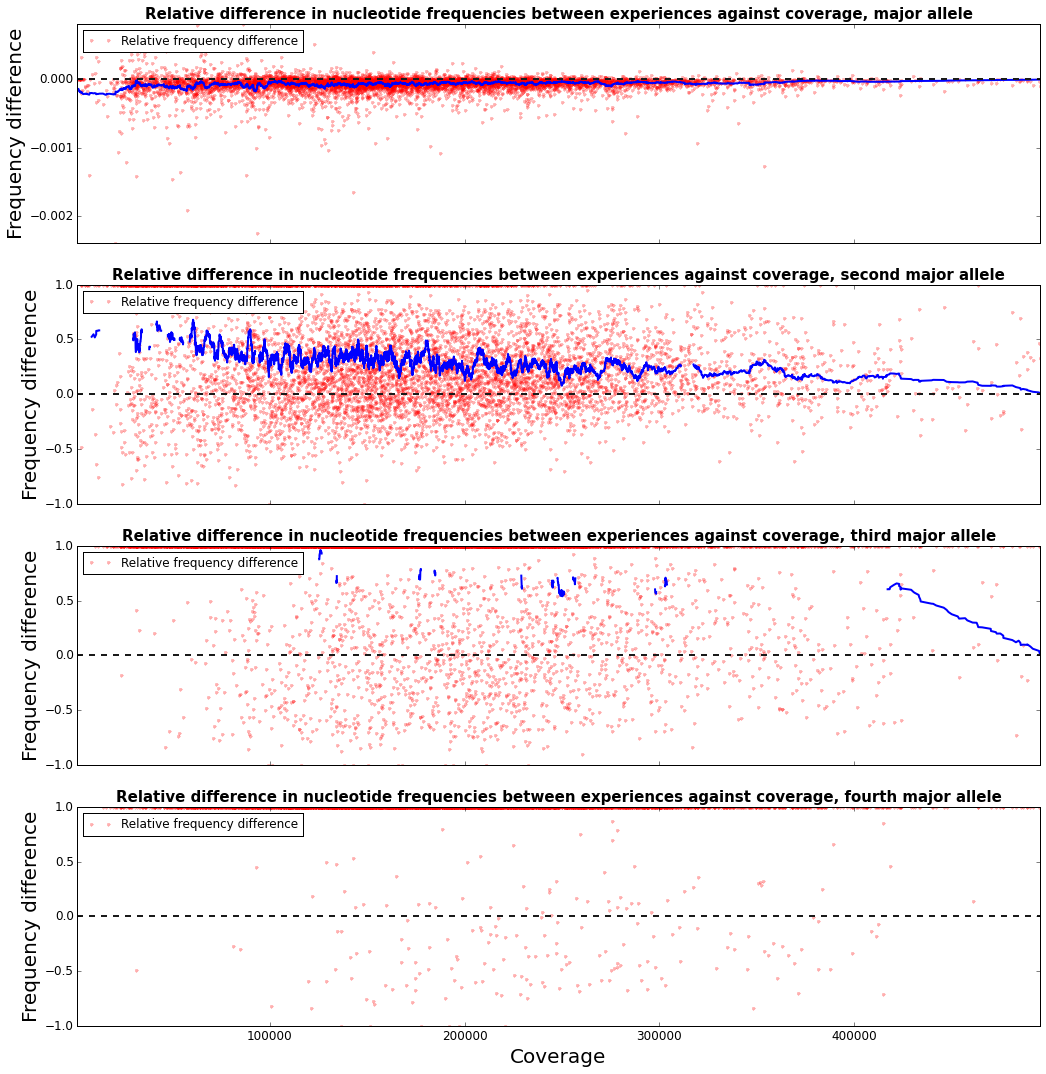

In [41]:
%matplotlib inline

def scatterPlotRatioDifferenceVsCoverage (subplot, ratio1, ratio2,  title):
    rcParams['figure.figsize'] = 18, 8
    subplot.set_title(title, fontsize=15, fontweight='bold')
    diffRatio = pd.Series([(x-y)/(x+y) for (x,y) in zip(ratio1,ratio2)])
    yaxis_lower_limit = diffRatio.min(skipna=True)
    yaxis_upper_limit = diffRatio.max(skipna=True)
    xaxis_lower_limit = counts ['coverage'].min()
    xaxis_upper_limit = counts ['coverage'].max()
    #diffRatio = abs((ratio1 - ratio2)/(ratio1)
    orderdiffRatioByCoverage = [x for (y,x) in sorted(zip(counts ['coverage'],diffRatio))]
    smoothedCurve = (runningMeanFast (orderdiffRatioByCoverage, 50))
    subplot.plot (counts ['coverage'], diffRatio, 'r.', alpha=0.3) 
    subplot.plot (sorted(counts ['coverage']), smoothedCurve, '-', alpha=1, linewidth=2) 
    subplot.set_ylabel ('Frequency difference')
    fig_size = rcParams["figure.figsize"]
    subplot.legend (['Relative frequency difference'], loc = 'upper left')
    #subplot.set_yscale('log')
    subplot.locator_params(axis='y',nbins=6)
    subplot.axhline(y = 0.00, linewidth=2, linestyle='dashed', color='0.1')
    subplot.axis ([xaxis_lower_limit, xaxis_upper_limit, yaxis_lower_limit, yaxis_upper_limit])


f, axarr = plt.subplots(4, sharex=True,figsize=(15,15))
scatterPlotRatioDifferenceVsCoverage(axarr[0], counts['majorBaseRatio'], counts2Repeats['majorBaseRatio'], 'Relative difference in nucleotide frequencies between experiences against coverage, major allele')
scatterPlotRatioDifferenceVsCoverage(axarr[1], counts['secondMajorBaseRatio'], counts2Repeats['secondMajorBaseRatio'], 'Relative difference in nucleotide frequencies between experiences against coverage, second major allele')
scatterPlotRatioDifferenceVsCoverage(axarr[2], counts['thirdMajorBaseRatio'], counts2Repeats['thirdMajorBaseRatio'], 'Relative difference in nucleotide frequencies between experiences against coverage, third major allele')
scatterPlotRatioDifferenceVsCoverage(axarr[3], counts['fourthMajorBaseRatio'], counts2Repeats['fourthMajorBaseRatio'], 'Relative difference in nucleotide frequencies between experiences against coverage, fourth major allele')



plt.xlabel ('Coverage')
plt.tight_layout()



### Conclusion: The frequency of the major allele seems to be well estimated with 2 repeats instead of 3 ; however the minor alleles do less well.

## General conclusions: What matters is really the high quality coverage, i.e. how many bases with quality over 60 have been read per position of the genome.
Therefore there is a trade-off: having more repeats increases the quality for all bases, but decreases the number of informative bases. We need to look further (e.g. into our real data) to investigate whether 2 repeats could be enough.